# **Project Name**    - Appliance energy prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual

Member Name - Mohit Bhardwaj


# **Project Summary -**

### **"Predicting Energy Consumption for Home Appliances Using Environmental and Indoor Conditions**"

**Objective**: The goal is to develop a predictive model that accurately estimates the energy consumption of home appliances based on indoor and outdoor environmental variables such as temperature, humidity, wind speed, visibility, and pressure. The model can assist in optimizing energy usage by predicting the consumption patterns in different conditions.

**Use Case:**
The model can be used to forecast energy consumption in smart homes, enabling better energy management, resource allocation, and automation of devices.
It can also help in reducing energy costs by providing insights into factors driving higher energy use.

Potential Applications:
Energy-efficient home automation: Integrating the model into smart homes for real-time prediction and adjustment of appliance usage to minimize energy consumption.

Cost-saving solutions: Providing users with recommendations on how to optimize the use of appliances based on weather and indoor conditions.


Environmental impact analysis: Understanding the influence of weather conditions on household energy consumption can aid in creating more sustainable energy solutions

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Optimizing Energy Consumption in Smart Homes: Predicting Appliance Usage Based on Environmental and Indoor Conditions for Sustainable Living"**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df = pd.read_csv('/content/drive/MyDrive/Copy of data_application_energy.csv')
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11-01-2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11-01-2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11-01-2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11-01-2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11-01-2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410390  45.410390  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


(19735, 29)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<Axes: >

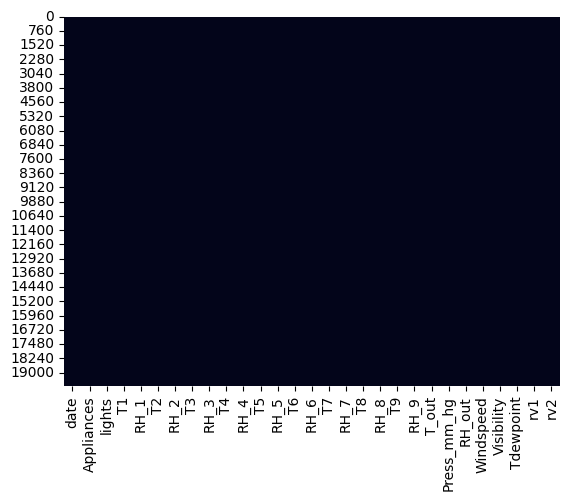

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.412580    755.522602   
std    ...      2.014712      4.151497      5.318464      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.670000    750.933333   
50%    ...     19.390000     40.900000      6.920000    756.100000   
75%    ...     20.600000     44.338095     10.400000    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760995     24.988033   
std       14.901088      2.451221     11.794719      4.195248     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.430000     24.897653   
75%       91.666667      5.500000     40.000000      6.570000     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

### Variables Description

The dataset contains 19,735 entries and 29 columns, with no missing values. Here's a breakdown of the key columns:

**Date:** Timestamp for each record (object type).

**Appliances**: Energy use of appliances (int64).

**Lights:** Energy use of lights (int64).

**T1-T9**: Temperature readings from different rooms (float64).

**RH_1-RH_9:** Relative humidity readings from different rooms (float64).

**T_out**: Outside temperature (float64).

**Press_mm_hg**: Pressure in mm Hg (float64).

**RH_out:** Outside relative humidity (float64).

**Windspeed**: Wind speed (float64).

**Visibility**: Outside visibility in meters (float64).

**Tdewpoint**: Dew point temperature (float64).


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9708
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1055
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       412
Tdewpoint       1118
rv1            19735
rv2            19735
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Write your code to make your dataset analysis ready.
df.head()
#converting date column in date time format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
#dropping 'rv2' since 'rv1' aand 'rv2' have similar values
df.drop('rv2', axis=1, inplace=True)



In [ ]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...       RH_8         T9   RH_9  T_out  \
0  19.79  44.730000  19.000000  ...  48.900000  17.033333  45.53   6.60   
1  19.79  44.790000  19.000000  ...  48.863333  17.066667  45.56   6.48   
2  19.79  44.933333  18.926667  ...  48.730000  17.000000  45.50   6.37   
3  19.79  45.000000  18.890000  ...  48.590000  17.000000  45.40   6.25   
4  19.79  45.000000  18.890000  ...  48.590000  17.000000  45.40   6.13   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410390  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  

[5 rows x 28 columns]

### What all manipulations have you done and insights you found?

Converted date column into date time format and dropped rvs2 column since all values are similar to rv1 column.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

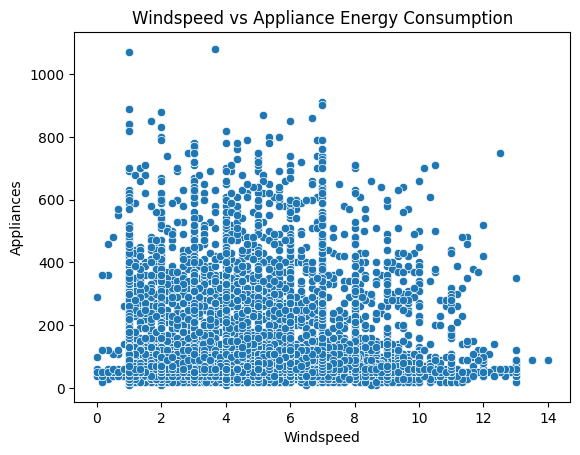

In [ ]:
# Chart - 1 visualization code
sns.scatterplot(x='Windspeed', y='Appliances', data=df)
plt.title('Windspeed vs Appliance Energy Consumption')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

this chart tells us about the appliances usage relation with windspeed, as the windseep increases appliances usage is decreasing

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

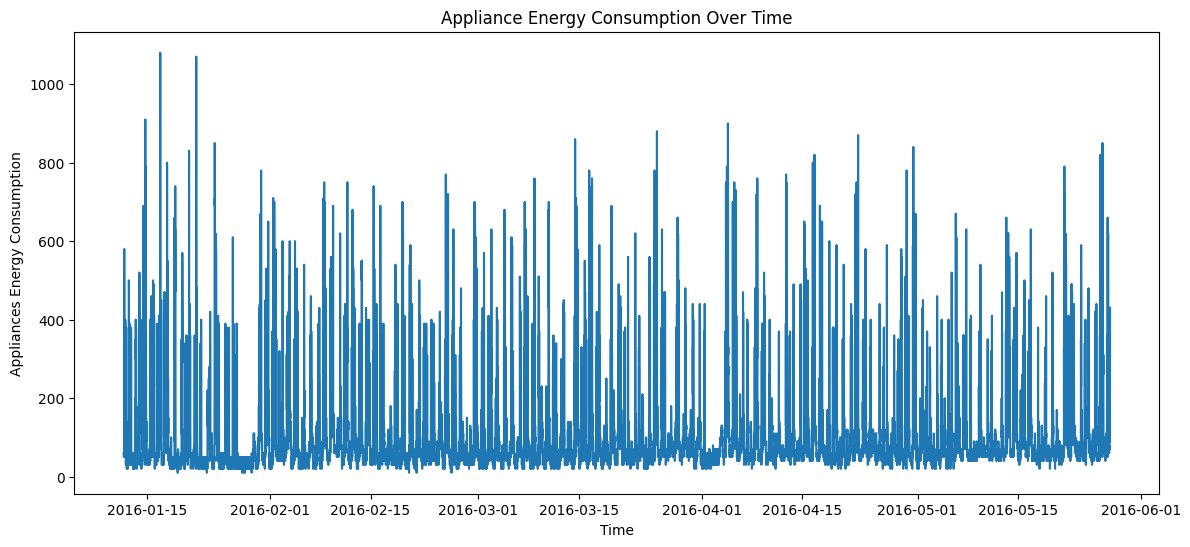

In [ ]:
# Chart - 2 visualization code
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['Appliances'])
plt.title('Appliance Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Appliances Energy Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

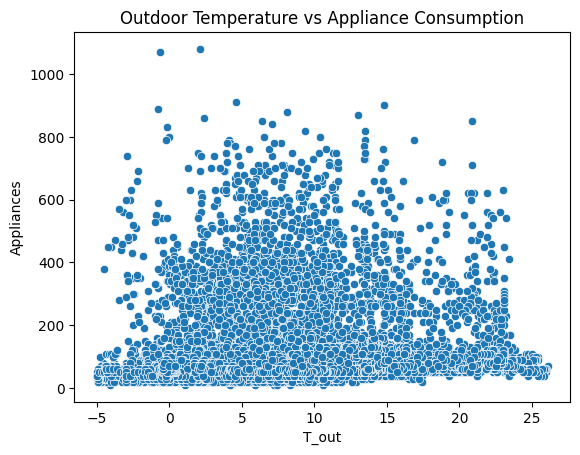

In [ ]:
# Chart - 3 visualization code
sns.scatterplot(x='T_out', y='Appliances', data=df)
plt.title('Outdoor Temperature vs Appliance Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

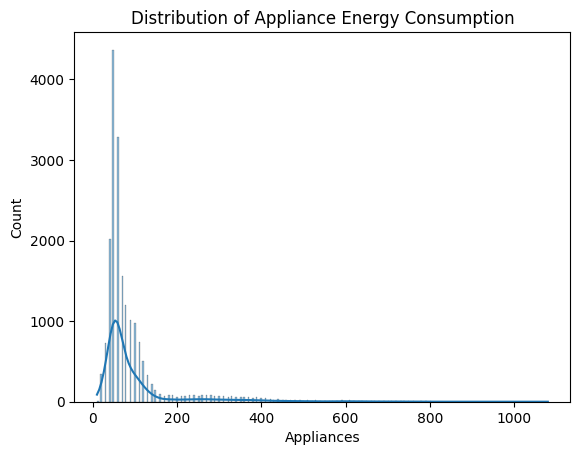

In [ ]:
# Chart - 4 visualization code
sns.histplot(df['Appliances'], kde=True)
plt.title('Distribution of Appliance Energy Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

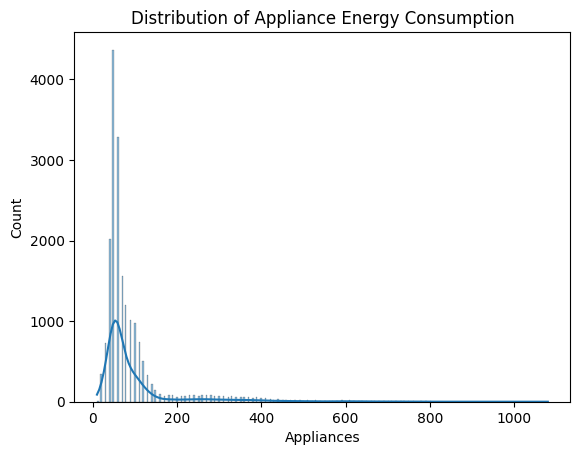

In [ ]:
# Chart - 5 visualization code
sns.histplot(df['Appliances'], kde=True)
plt.title('Distribution of Appliance Energy Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

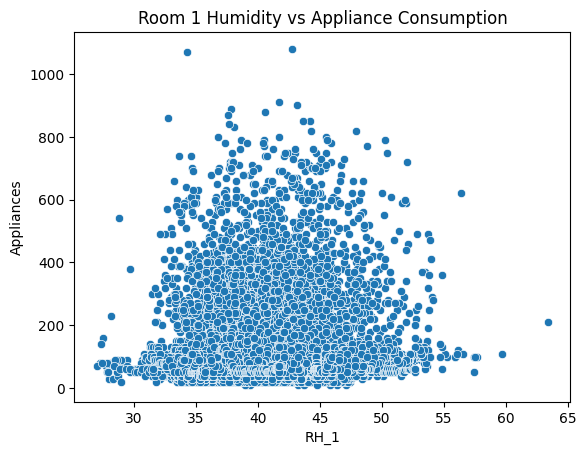

In [ ]:
# Chart - 6 visualization code
sns.scatterplot(x='RH_1', y='Appliances', data=df)
plt.title('Room 1 Humidity vs Appliance Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

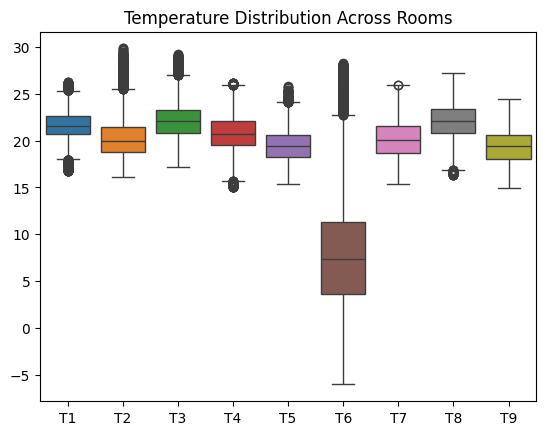

In [ ]:
# Chart - 7 visualization code
sns.boxplot(data=df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']])
plt.title('Temperature Distribution Across Rooms')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

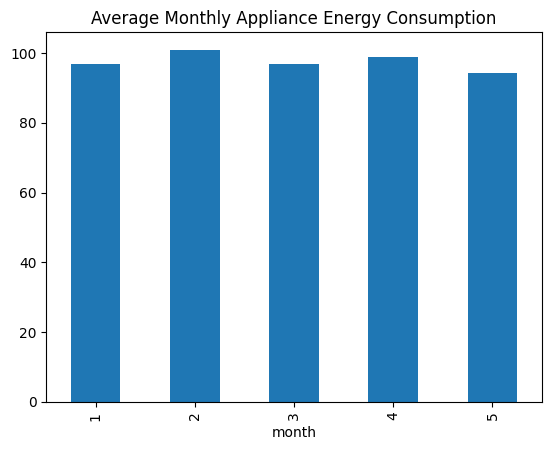

In [ ]:
# Chart - 8 visualization code
df['month'] = df['date'].dt.month
monthly_energy = df.groupby('month')['Appliances'].mean()
monthly_energy.plot(kind='bar')
plt.title('Average Monthly Appliance Energy Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

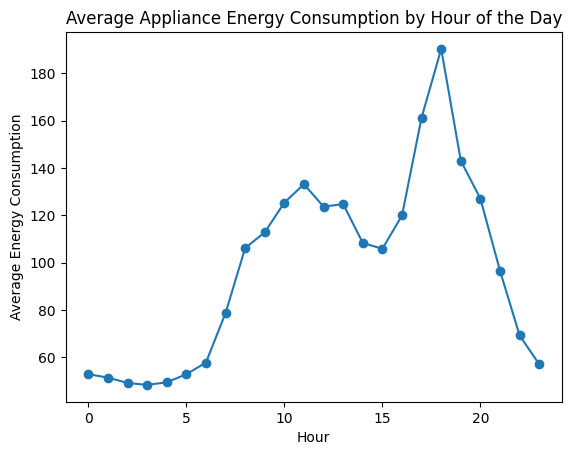

In [ ]:
# Chart - 9 visualization code
df['hour'] = df['date'].dt.hour
hourly_energy = df.groupby('hour')['Appliances'].mean()
hourly_energy.plot(kind='line', marker='o')
plt.title('Average Appliance Energy Consumption by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Energy Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

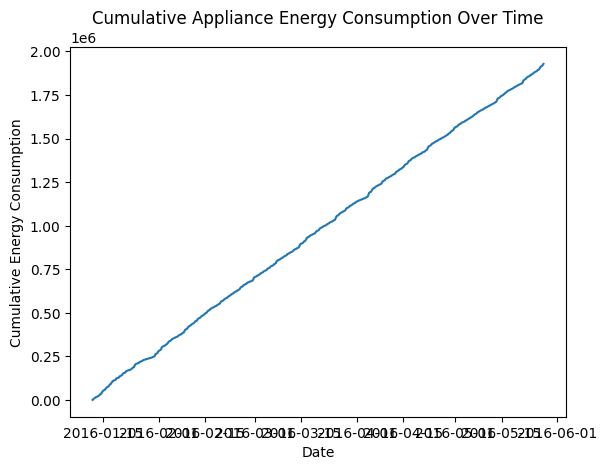

In [ ]:
# Chart - 10 visualization code
df['cumulative_energy'] = df['Appliances'].cumsum()
plt.plot(df['date'], df['cumulative_energy'])
plt.title('Cumulative Appliance Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Energy Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

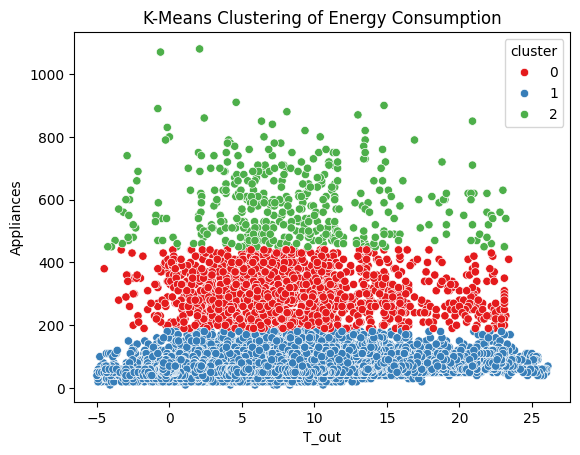

In [ ]:
# Chart - 11 visualization code
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['T_out', 'Appliances', 'RH_out']])

sns.scatterplot(x='T_out', y='Appliances', hue='cluster', data=df, palette='Set1')
plt.title('K-Means Clustering of Energy Consumption')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Correlation Heatmap

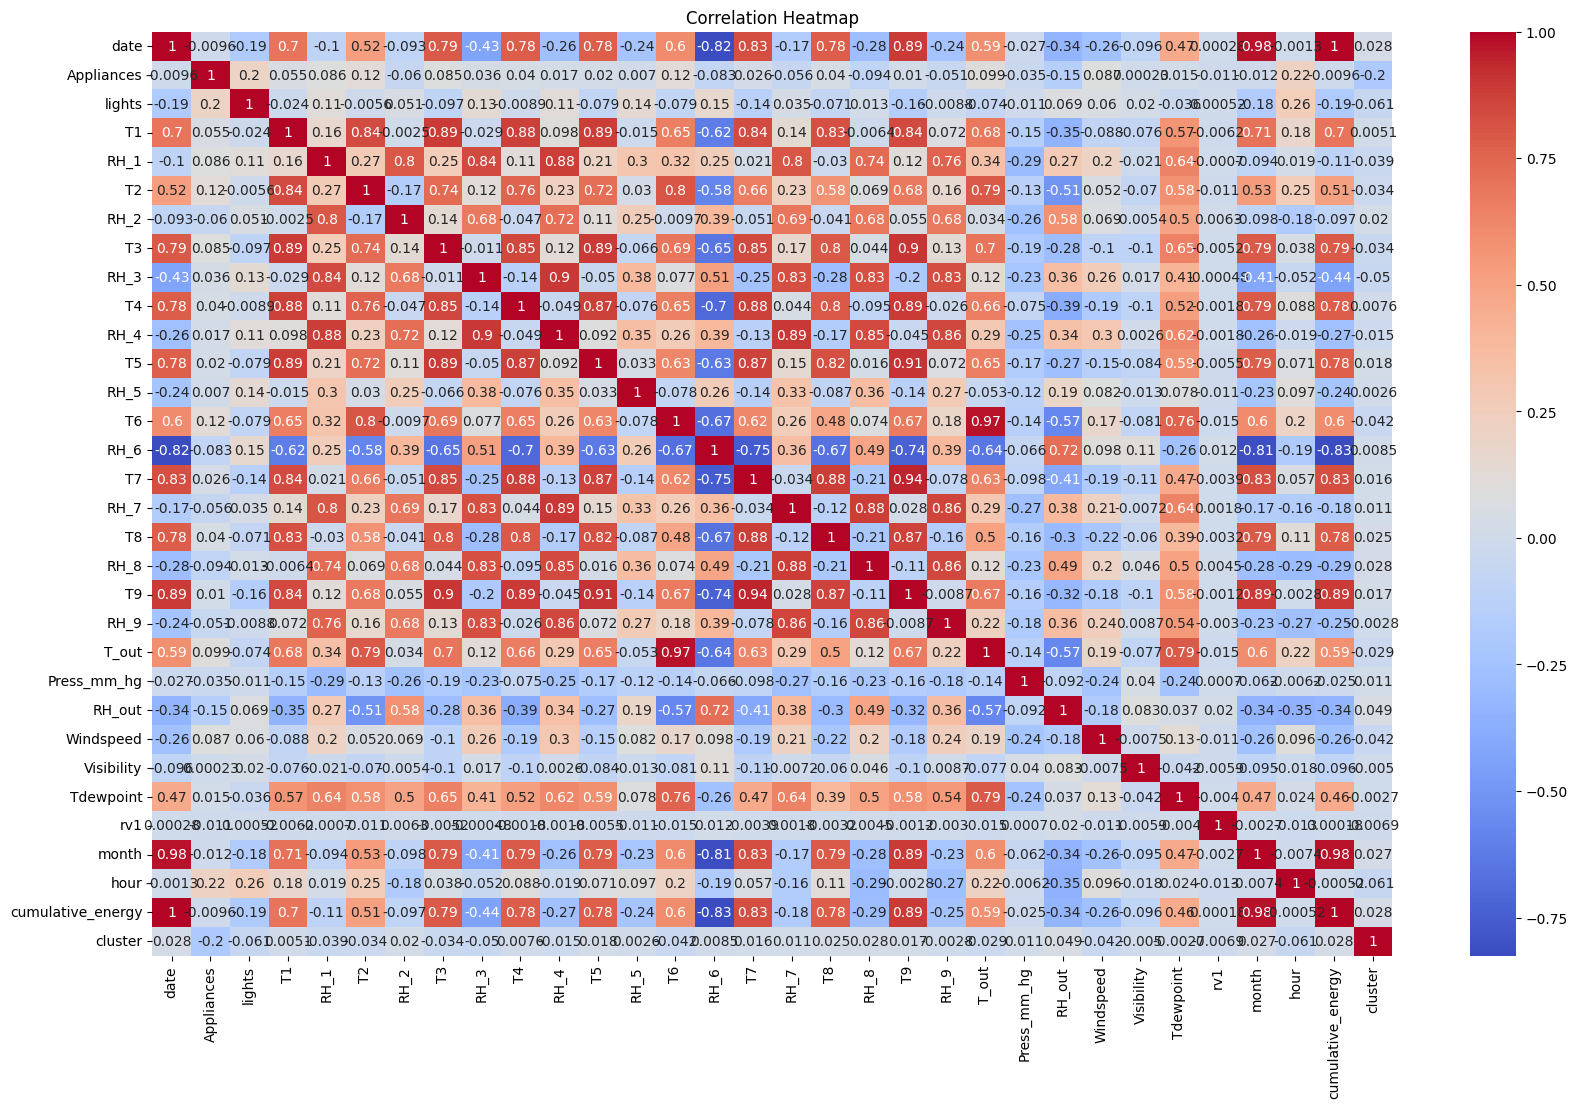

In [ ]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Corelation heatmap chart gives us all the insights regarding the positive or negative co relation between diffrent columns

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 13 - Pair Plot

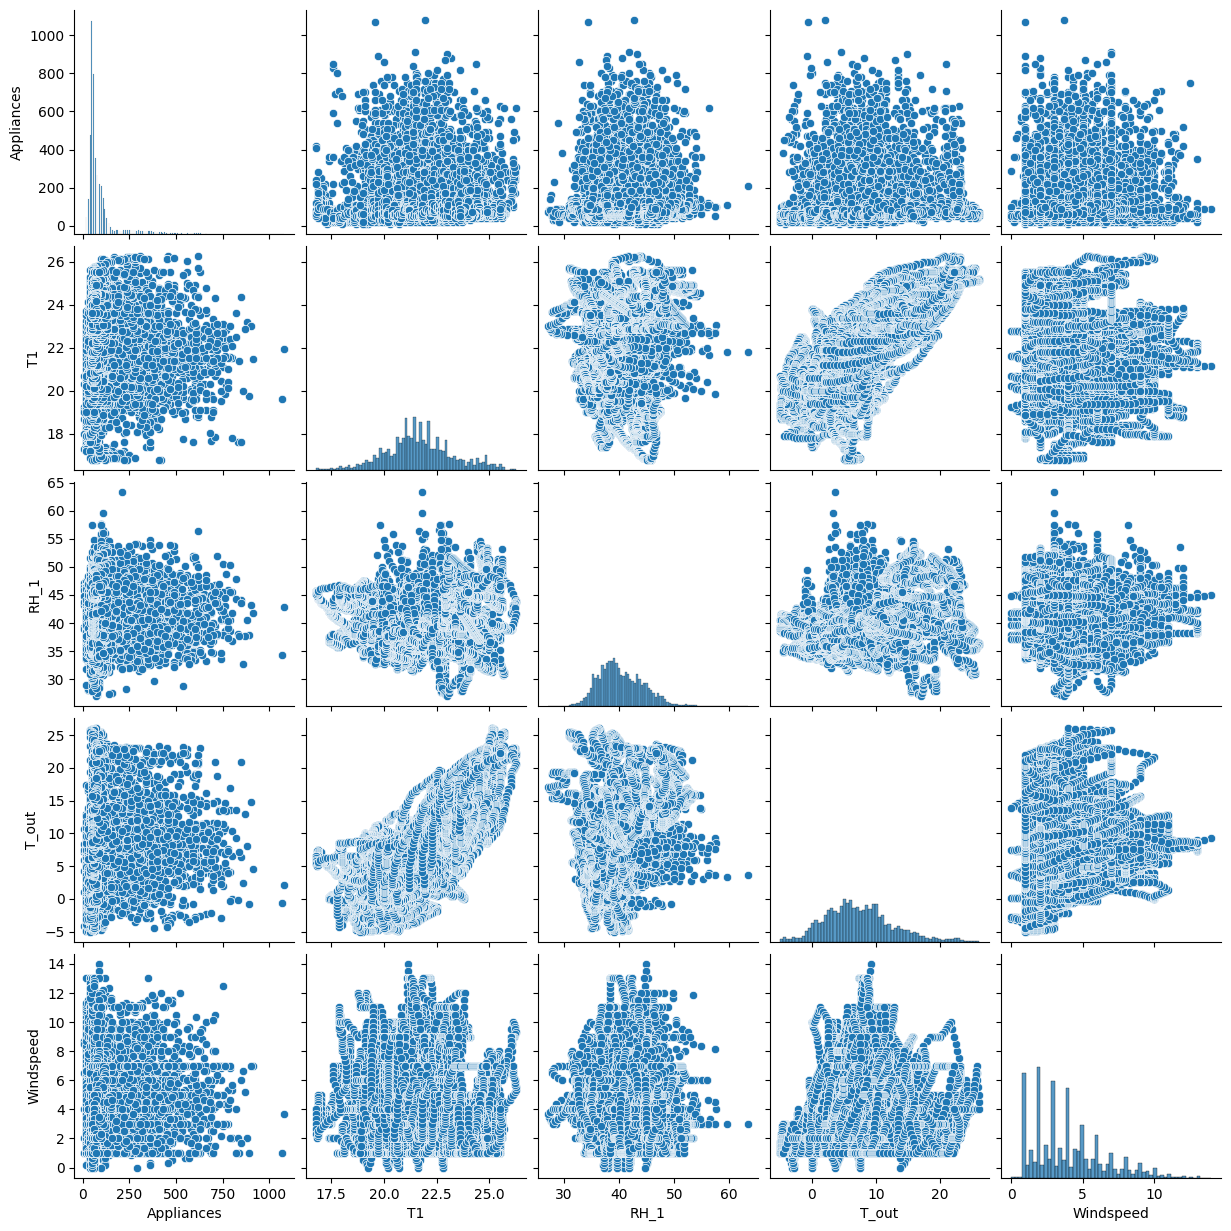

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[['Appliances', 'T1', 'RH_1', 'T_out', 'Windspeed']])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df.describe()

date    Appliances        lights            T1  \
count                19735  19735.000000  19735.000000  19735.000000   
mean   2016-03-20 05:30:00     97.694958      3.801875     21.686571   
min    2016-01-11 17:00:00     10.000000      0.000000     16.790000   
25%    2016-02-14 23:15:00     50.000000      0.000000     20.760000   
50%    2016-03-20 05:30:00     60.000000      0.000000     21.600000   
75%    2016-04-23 11:45:00    100.000000      0.000000     22.600000   
max    2016-05-27 18:00:00   1080.000000     70.000000     26.260000   
std                    NaN    102.524891      7.935988      1.606066   

               RH_1            T2          RH_2            T3          RH_3  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.259739     20.341219     40.420420     22.267611     39.242500   
min       27.023333     16.100000     20.463333     17.200000     28.766667   
25%       37.333333     18.790000     37.900000     20.790000     36.900000   
50%       39.656667     20.000000     40.500000     22.100000     38.530000   
75%       43.066667     21.500000     43.260000     23.290000     41.760000   
max       63.360000     29.856667     56.026667     29.236000     50.163333   
std        3.979299      2.192974      4.069813      2.006111      3.254576   

                 T4  ...          RH_8            T9          RH_9  \
count  19735.000000  ...  19735.000000  19735.000000  19735.000000   
mean      20.855335  ...     42.936165     19.485828     41.552401   
min       15.100000  ...     29.600000     14.890000     29.166667   
25%       19.530000  ...     39.066667     18.000000     38.500000   
50%       20.666667  ...     42.375000     19.390000     40.900000   
75%       22.100000  ...     46.536000     20.600000     44.338095   
max       26.200000  ...     58.780000     24.500000     53.326667   
std        2.042884  ...      5.224361      2.014712      4.151497   

              T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.412580    755.522602     79.750418      4.039752     38.330834   
min       -5.000000    729.300000     24.000000      0.000000      1.000000   
25%        3.670000    750.933333     70.333333      2.000000     29.000000   
50%        6.920000    756.100000     83.666667      3.666667     40.000000   
75%       10.400000    760.933333     91.666667      5.500000     40.000000   
max       26.100000    772.300000    100.000000     14.000000     66.000000   
std        5.318464      7.399441     14.901088      2.451221     11.794719   

          Tdewpoint           rv1  
count  19735.000000  19735.000000  
mean       3.760995     24.988033  
min       -6.600000      0.005322  
25%        0.900000     12.497889  
50%        3.430000     24.897653  
75%        6.570000     37.583769  
max       15.500000     49.996530  
std        4.195248     14.496634  

[8 rows x 28 columns]

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
num_features = df.describe().columns
num_features

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1'],
      dtype='object')

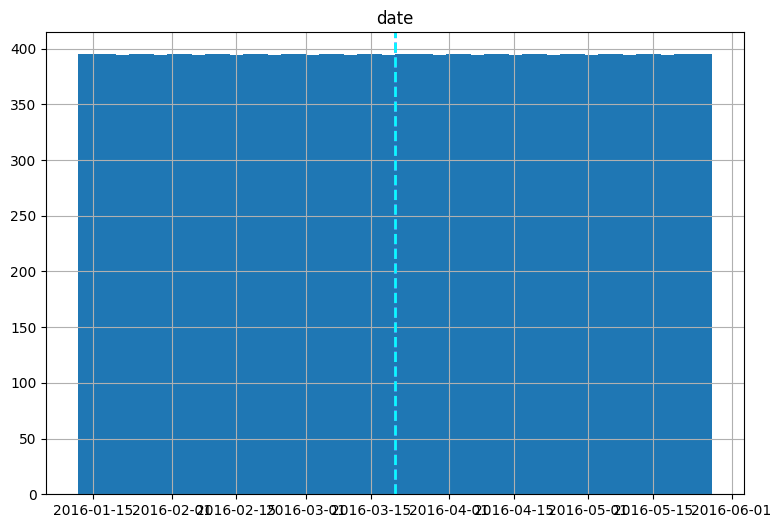

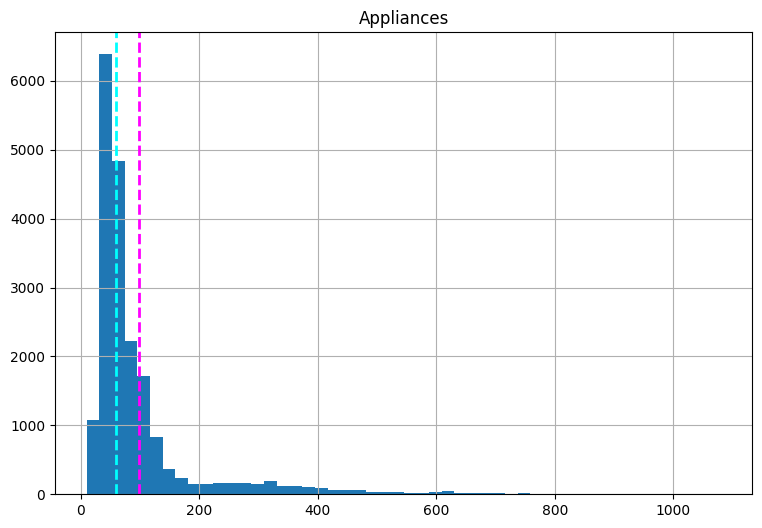

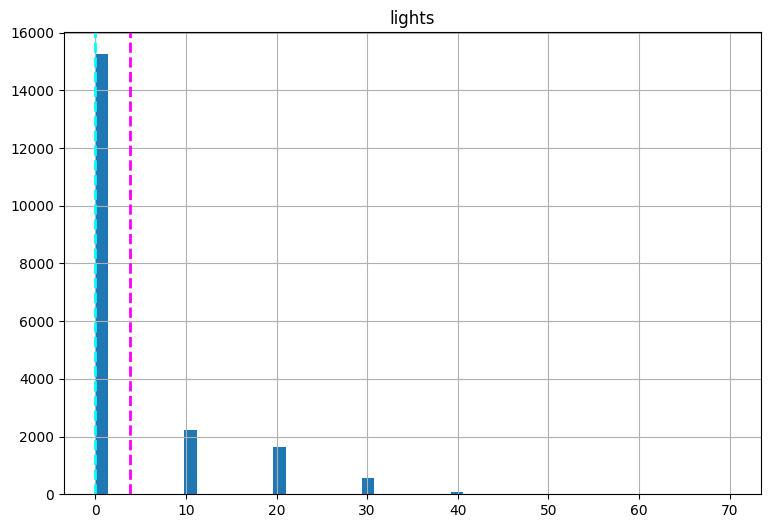

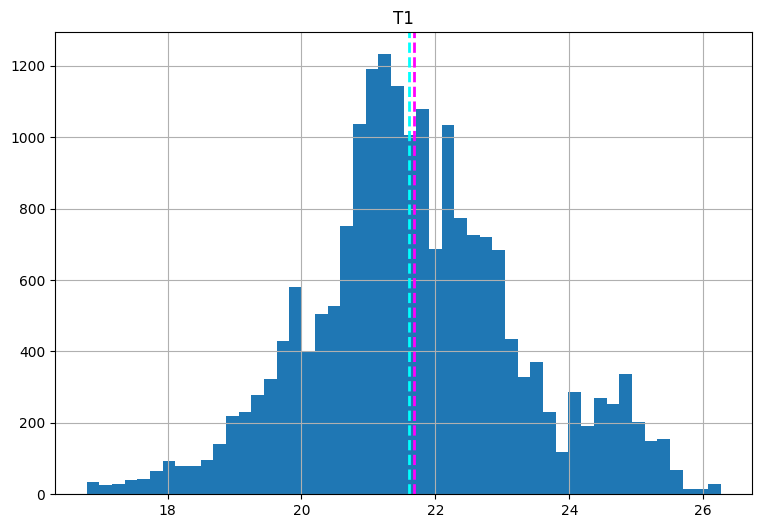

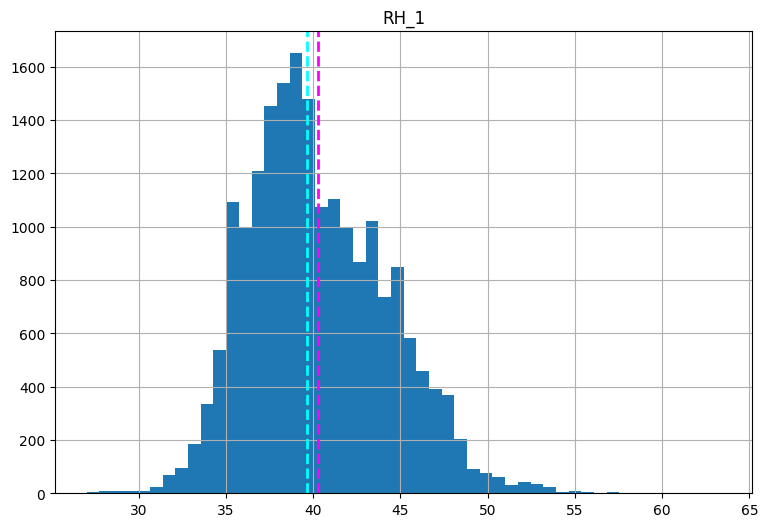

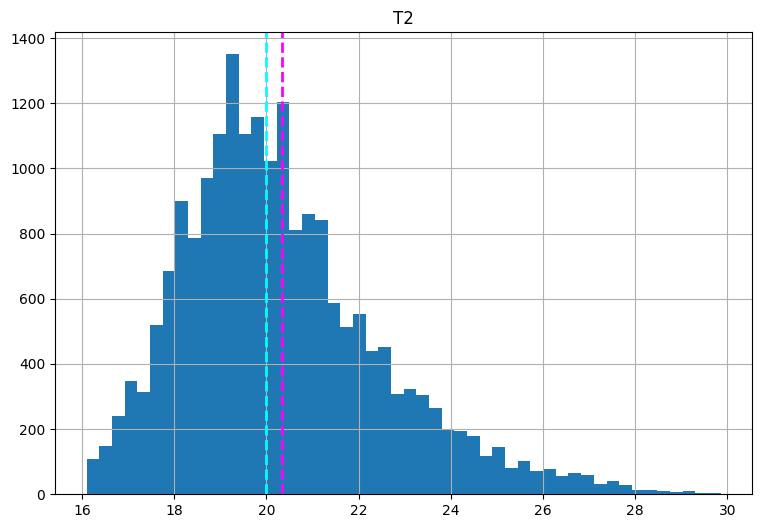

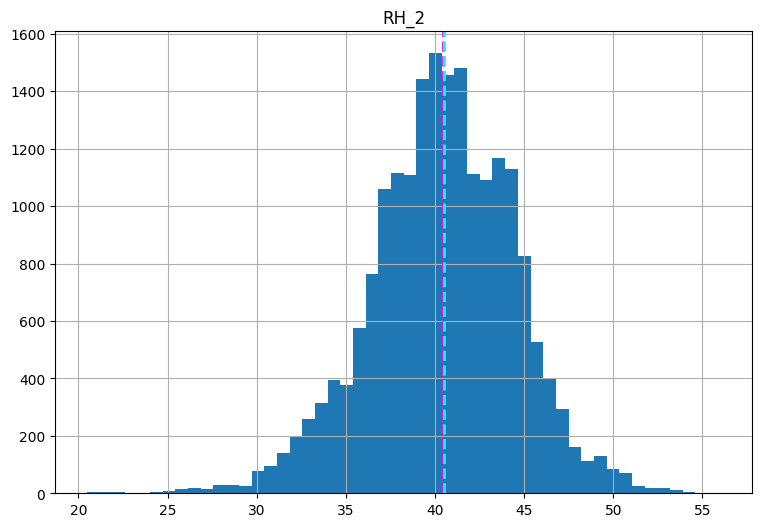

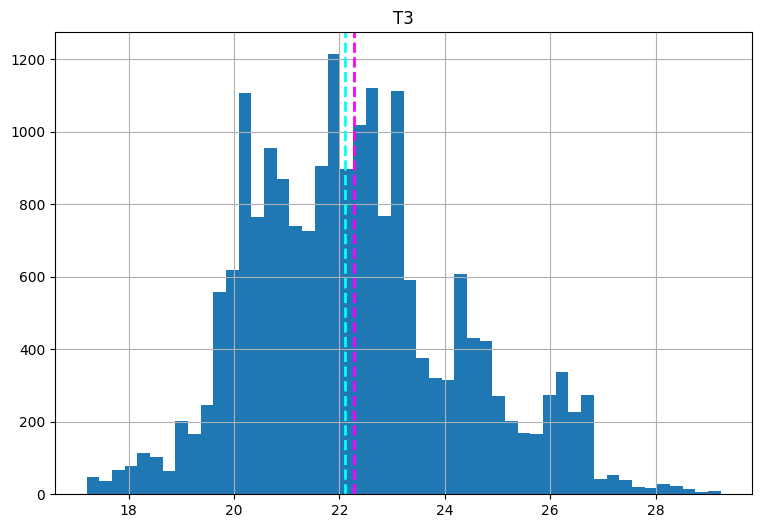

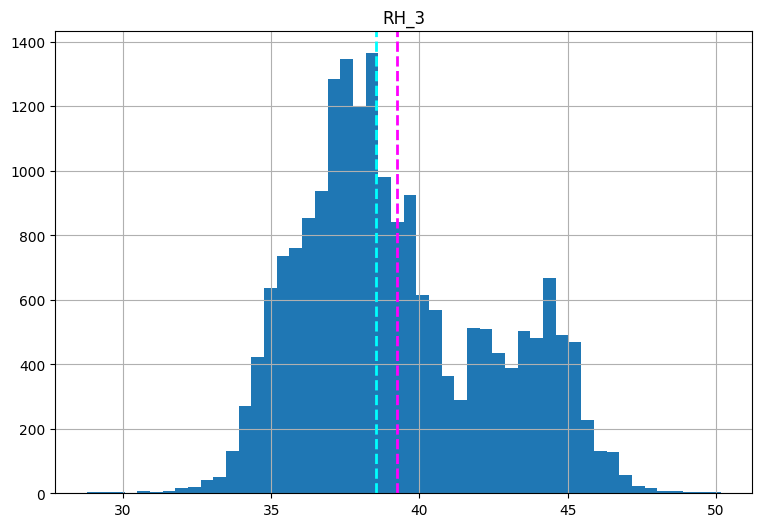

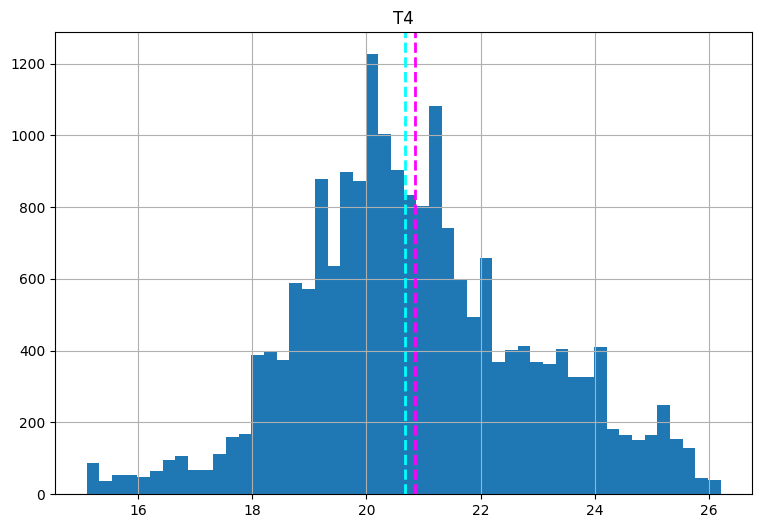

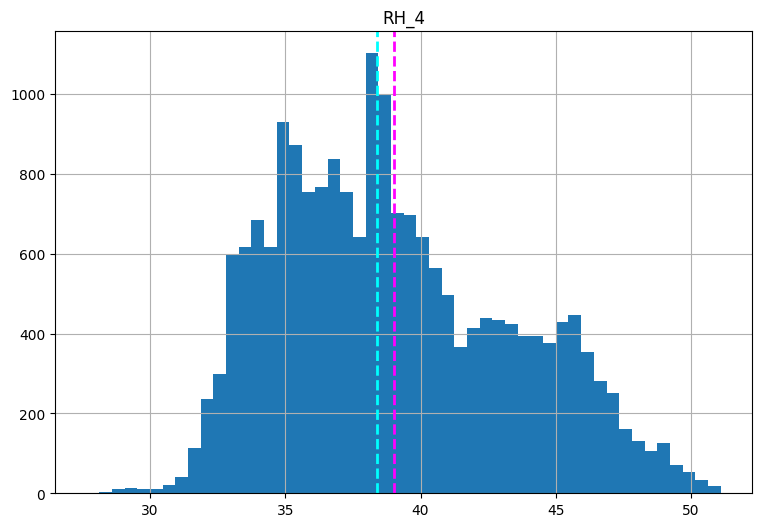

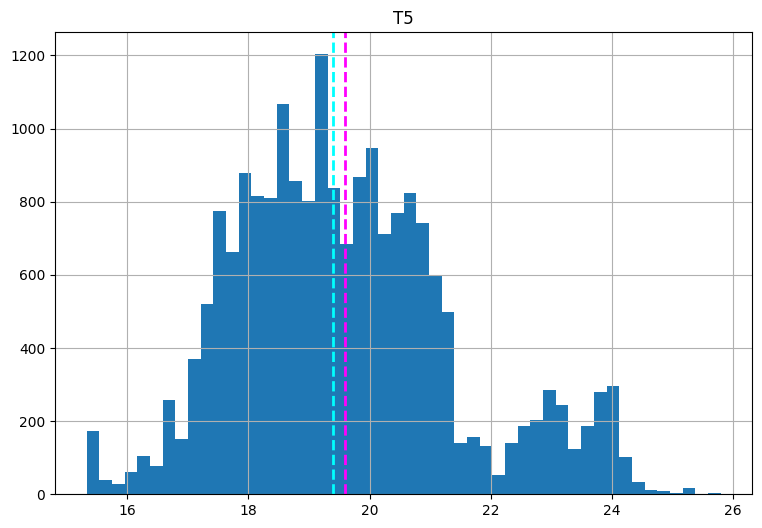

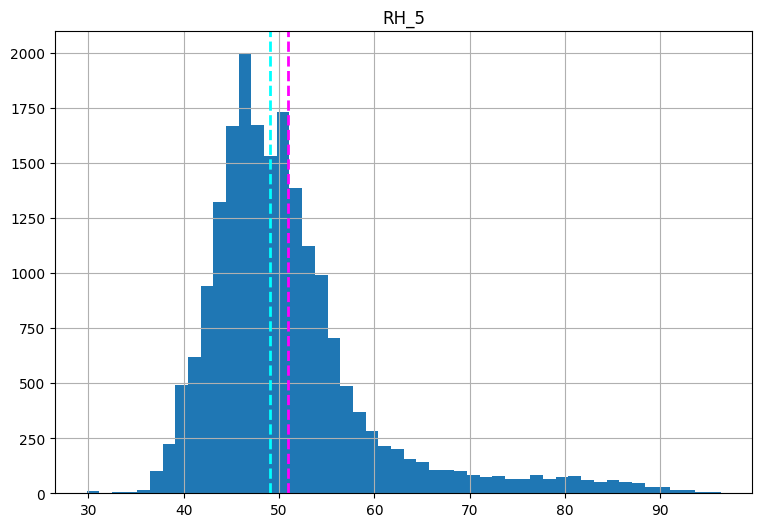

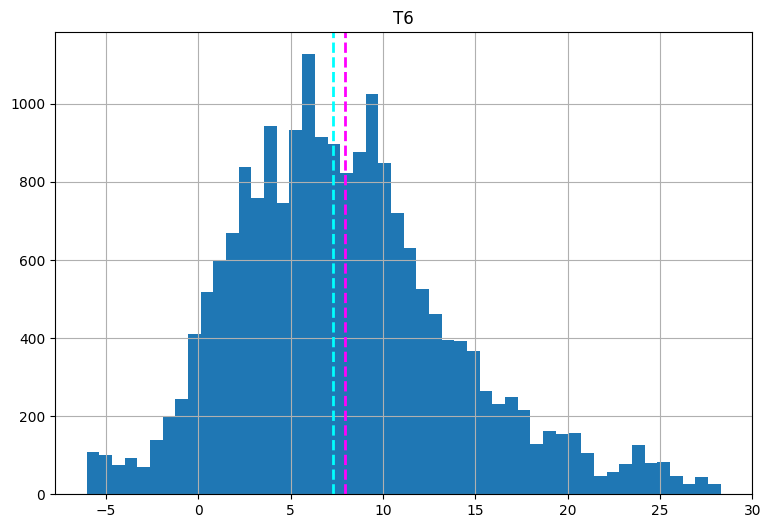

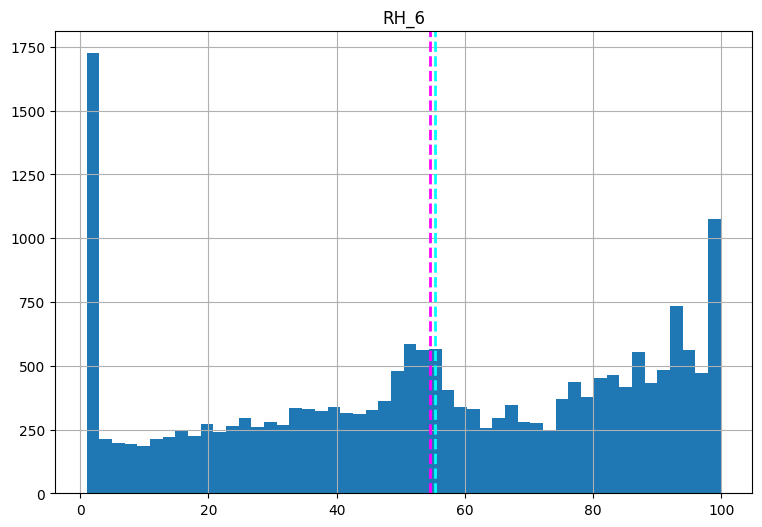

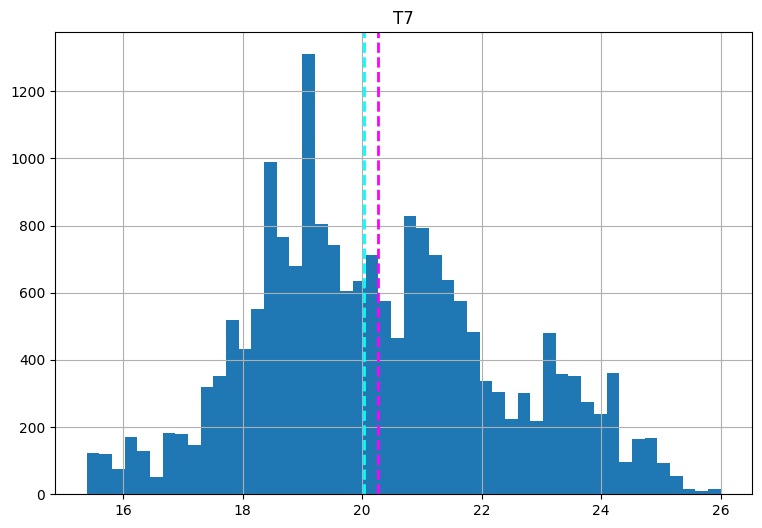

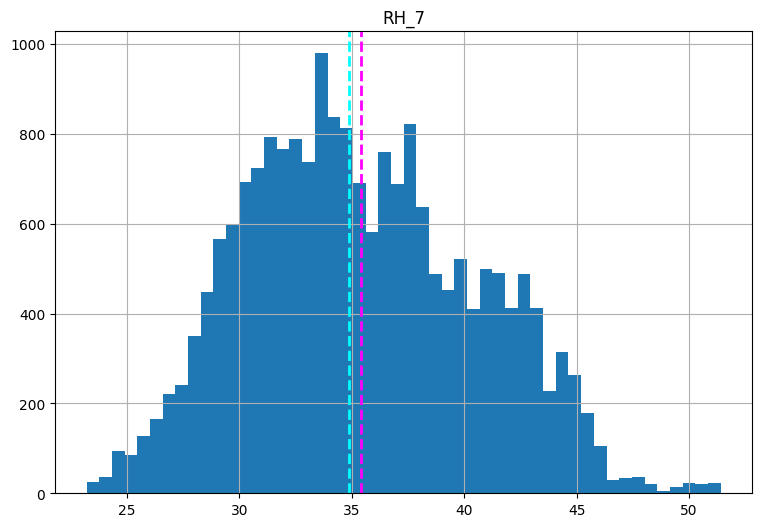

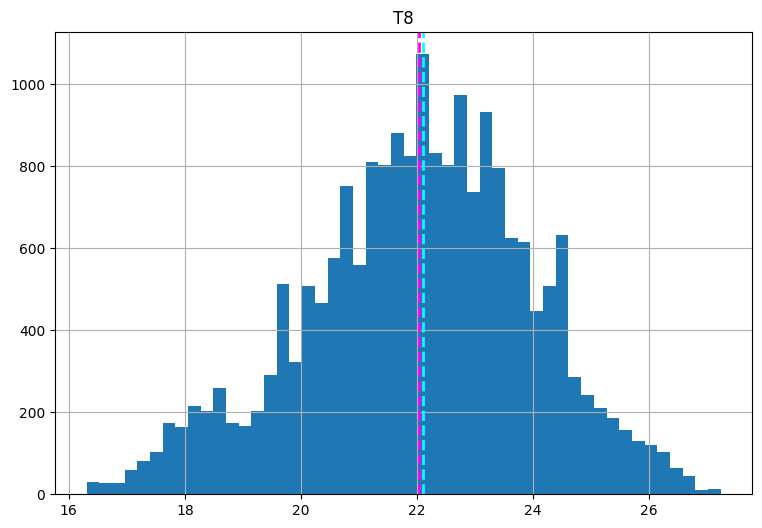

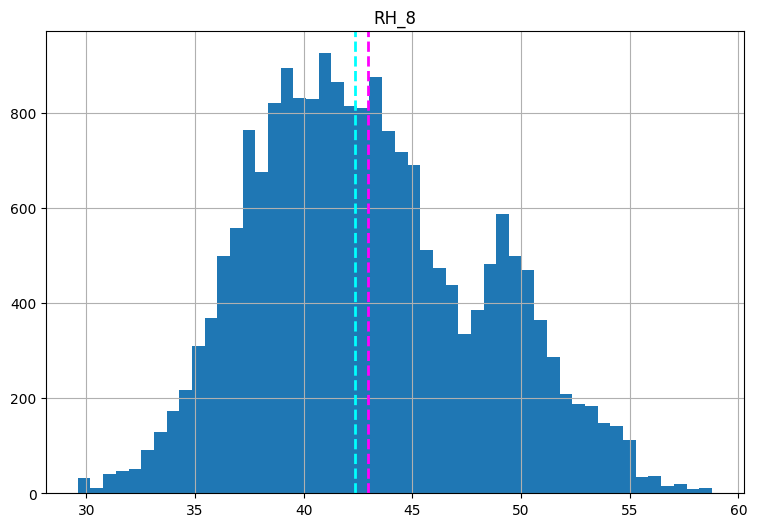

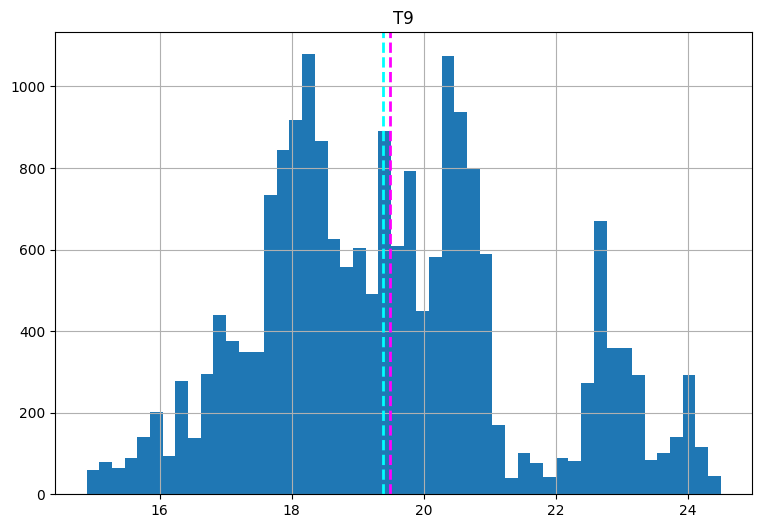

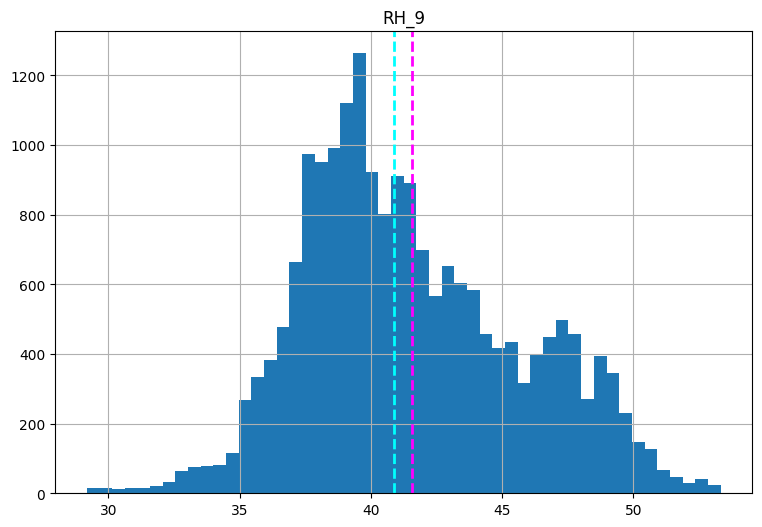

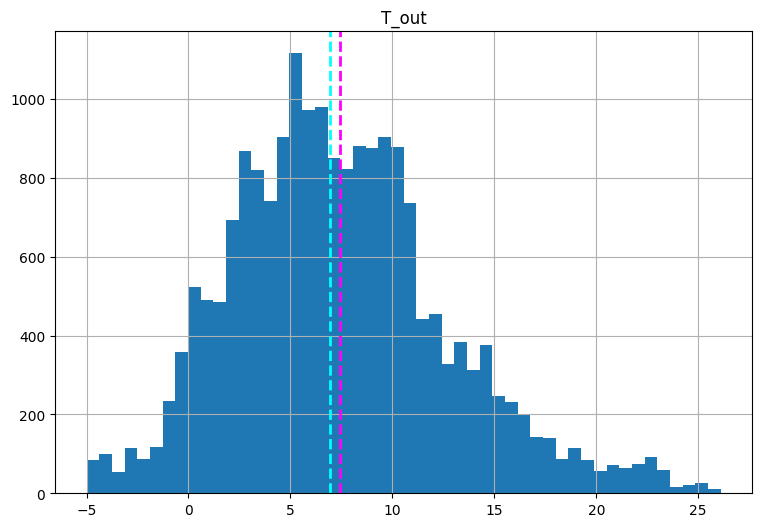

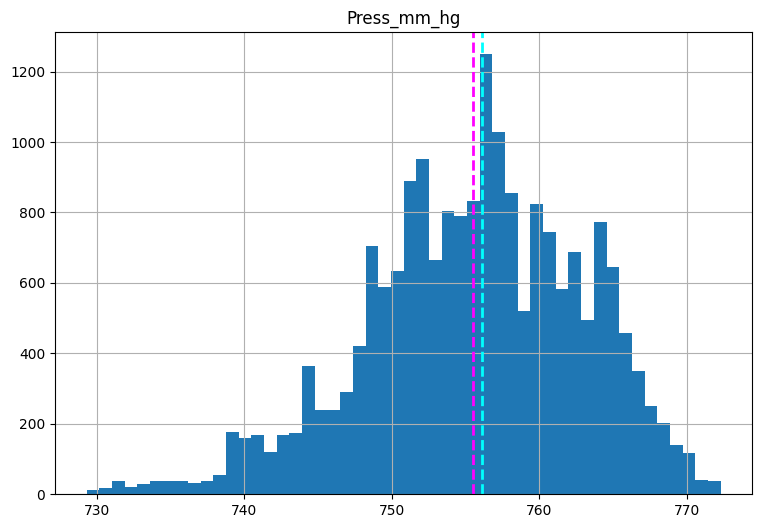

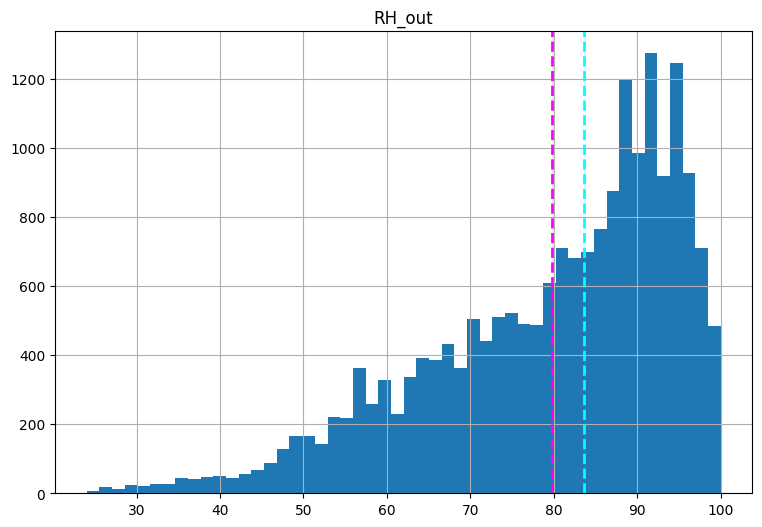

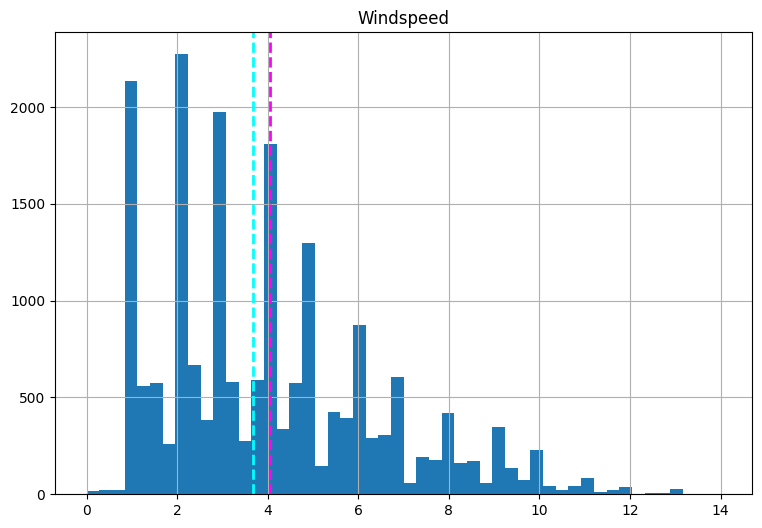

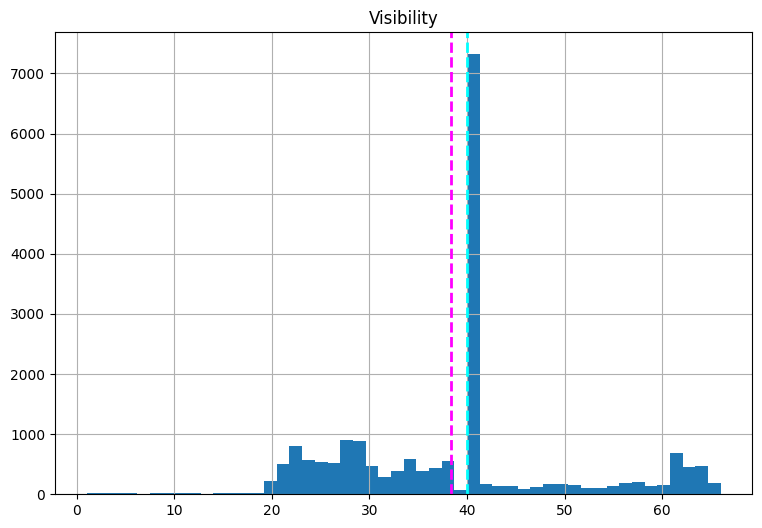

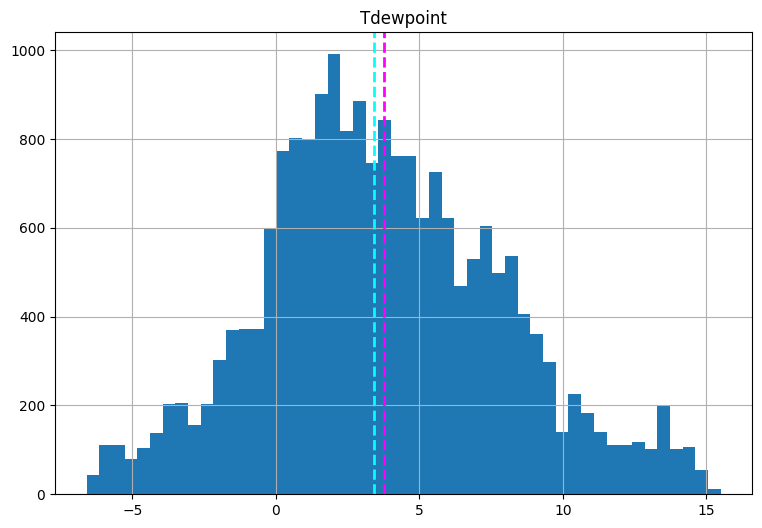

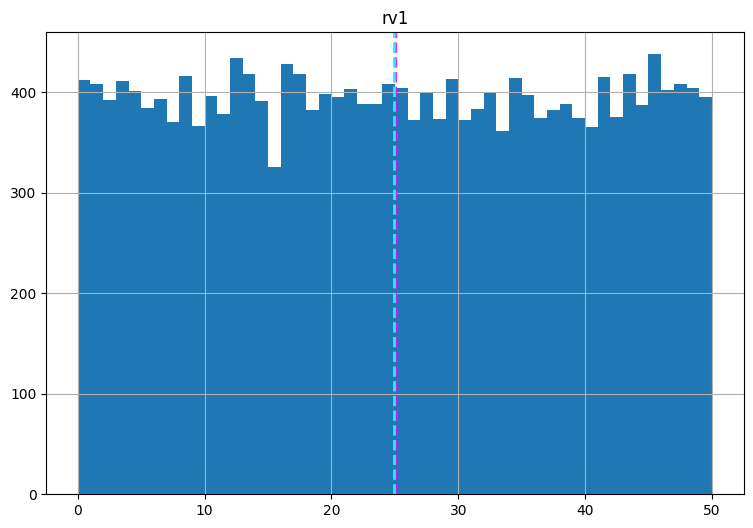

In [ ]:
for col in num_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

In [ ]:
# Correlation & scatter plot 'Appliances'
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature =(df[col])
  label = df['Appliances']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Date')
  ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Appliances'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)


plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
X = df[[col for col in numeric_columns if col != 'Appliances']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display the VIF values
print(vif_data)


        Feature         VIF
0        lights    1.284851
1            T1   19.672865
2          RH_1   15.960398
3            T2   28.807991
4          RH_2   21.895712
5            T3   10.000320
6          RH_3   10.822193
7            T4    9.834074
8          RH_4   17.129349
9            T5   10.514336
10         RH_5    1.378428
11           T6   33.458864
12         RH_6    9.994014
13           T7   17.502396
14         RH_7   10.825032
15           T8    8.052314
16         RH_8    8.510230
17           T9   28.280153
18         RH_9    6.488954
19        T_out  146.677011
20  Press_mm_hg    1.406678
21       RH_out   49.186311
22    Windspeed    1.607834
23   Visibility    1.041358
24    Tdewpoint   86.053071
25          rv1    1.001209


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
new_df = pd.get_dummies(df,drop_first=True,sparse=True)
new_df.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  day_of_week_Monday  day_of_week_Saturday  \
0  19.000000  45.566667  ...                True                 False   
1  19.000000  45.992500  ...                True                 False   
2  18.926667  45.890000  ...                True                 False   
3  18.890000  45.723333  ...                True                 False   
4  18.890000  45.530000  ...                True                 False   

   day_of_week_Sunday  day_of_week_Thursday  day_of_week_Tuesday  \
0               False                 False                False   
1               False                 False                False   
2               False                 False                False   
3               False                 False                False   
4               False                 False                False   

   day_of_week_Wednesday  month_February  month_January  month_March  \
0                  False           False           True        False   
1                  False           False           True        False   
2                  False           False           True        False   
3                  False           False           True        False   
4                  False           False           True        False   

   month_May  
0      False  
1      False  
2      False  
3      False  
4      False  

[5 rows x 37 columns]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

##### What all feature selection methods have you used  and why?

In [ ]:
x = new_df.drop('Appliances',axis=1)
y = new_df['Appliances']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15788, 27)
(3947, 27)
(15788,)
(3947,)


Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].map(lambda x: x.year).astype("object")


df.drop(['date'],axis=1,inplace=True)
df.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  T_out  Press_mm_hg  RH_out  Windspeed  \
0  19.000000  45.566667  ...   6.60        733.5    92.0   7.000000   
1  19.000000  45.992500  ...   6.48        733.6    92.0   6.666667   
2  18.926667  45.890000  ...   6.37        733.7    92.0   6.333333   
3  18.890000  45.723333  ...   6.25        733.8    92.0   6.000000   
4  18.890000  45.530000  ...   6.13        733.9    92.0   5.666667   

   Visibility  Tdewpoint        rv1  day_of_week    month  year  
0   63.000000        5.3  13.275433       Monday  January  2016  
1   59.166667        5.2  18.606195       Monday  January  2016  
2   55.333333        5.1  28.642668       Monday  January  2016  
3   51.500000        5.0  45.410390       Monday  January  2016  
4   47.666667        4.9  10.084097       Monday  January  2016  

[5 rows x 30 columns]

In [ ]:
df['week'] = df['day_of_week'].apply(lambda x:'weekend' if x in ['Saturday','Sunday'] else 'weekday')
df.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  Press_mm_hg  RH_out  Windspeed  Visibility  \
0  19.000000  45.566667  ...        733.5    92.0   7.000000   63.000000   
1  19.000000  45.992500  ...        733.6    92.0   6.666667   59.166667   
2  18.926667  45.890000  ...        733.7    92.0   6.333333   55.333333   
3  18.890000  45.723333  ...        733.8    92.0   6.000000   51.500000   
4  18.890000  45.530000  ...        733.9    92.0   5.666667   47.666667   

   Tdewpoint        rv1  day_of_week    month  year     week  
0        5.3  13.275433       Monday  January  2016  weekday  
1        5.2  18.606195       Monday  January  2016  weekday  
2        5.1  28.642668       Monday  January  2016  weekday  
3        5.0  45.410390       Monday  January  2016  weekday  
4        4.9  10.084097       Monday  January  2016  weekday  

[5 rows x 31 columns]

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
int_columns_df = df.select_dtypes(include=['int', 'float'])
int_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [ ]:
int_columns_df.corr()

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lights         0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
T1             0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1           0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2             0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2          -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3             0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3           0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4             0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4           0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5             0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5           0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   
T6             0.117638 -0.079029  0.654769  0.316141  0.801186 -0.009670   
RH_6          -0.083178  0.153756 -0.615045  0.245126 -0.580372  0.389933   
T7             0.025801 -0.135347  0.838705  0.021397  0.663660 -0.051422   
RH_7          -0.055642  0.035069  0.135182  0.801122  0.229212  0.690584   
T8             0.039572 -0.071458  0.825413 -0.030053  0.578191 -0.041023   
RH_8          -0.094039  0.012915 -0.006441  0.736196  0.068534  0.679777   
T9             0.010010 -0.157592  0.844777  0.115263  0.675535  0.054544   
RH_9          -0.051462 -0.008766  0.071756  0.764001  0.157346  0.676467   
T_out          0.099155 -0.074423  0.682854  0.340788  0.792247  0.033703   
Press_mm_hg   -0.034885 -0.010576 -0.150574 -0.293957 -0.133028 -0.255646   
RH_out        -0.152282  0.068543 -0.345481  0.274126 -0.505291  0.584911   
Windspeed      0.087122  0.060281 -0.087654  0.204932  0.052495  0.069190   
Visibility     0.000230  0.020038 -0.076210 -0.021057 -0.069721 -0.005368   
Tdewpoint      0.015357 -0.036331  0.571333  0.639125  0.582632  0.499154   
rv1           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   

                   T3      RH_3        T4      RH_4  ...      RH_8        T9  \
Appliances   0.085060  0.036292  0.040281  0.016965  ... -0.094039  0.010010   
lights      -0.097393  0.131161 -0.008859  0.114936  ...  0.012915 -0.157592   
T1           0.892402 -0.028550  0.877001  0.097861  ... -0.006441  0.844777   
RH_1         0.253230  0.844677  0.106180  0.880359  ...  0.736196  0.115263   
T2           0.735245  0.121497  0.762066  0.231563  ...  0.068534  0.675535   
RH_2         0.137319  0.678326 -0.047304  0.721435  ...  0.679777  0.054544   
T3           1.000000 -0.011234  0.852778  0.122737  ...  0.044427  0.901324   
RH_3        -0.011234  1.000000 -0.140457  0.898978  ...  0.828822 -0.195270   
T4           0.852778 -0.140457  1.000000 -0.048650  ... -0.095192  0.889439   
RH_4         0.122737  0.898978 -0.048650  1.000000  ...  0.847259 -0.044518   
T5           0.888169 -0.050062  0.871813  0.091812  ...  0.016388  0.911055   
RH_5        -0.066355  0.375422 -0.076489  0.352591  ...  0.359840 -0.138509   
T6           0.686882  0.076833  0.652350  0.259047  ...  0.073721  0.667177   
RH_6        -0.647672  0.514912 -0.703149  0.392178  ...  0.489580 -0.738940   
T7           0.847374 -0.250090  0.877763 -0.131204  ... -0.209961  0.944776   
RH_7         0.172624  0.832685  0.043527  0.894301  ...  0.883984  0.028055   
T8           0.795283 -0.283228  0.796256 -0.167066  ... -0.209532  0.869338   
RH_8         0.044427  0.828822 -0.095192  0.847259  ...  1.000000 -0.113014   
T9           0.901324 -0.195270  0.889439 -0.044518  ... -0.113014  1.000000   
RH_9         0.134602  0.833538 -0.025549  0.856591  ...  0.855812 -0.008683   
T_out        0.699420  0.118237  0.663479  0.293307  ...  0.117164  0.668218   
Press_mm_hg -0.189974 -0.233274 -0.075292 -0.250748  ... -0.225591 -0.156828   
RH_out      -0.2

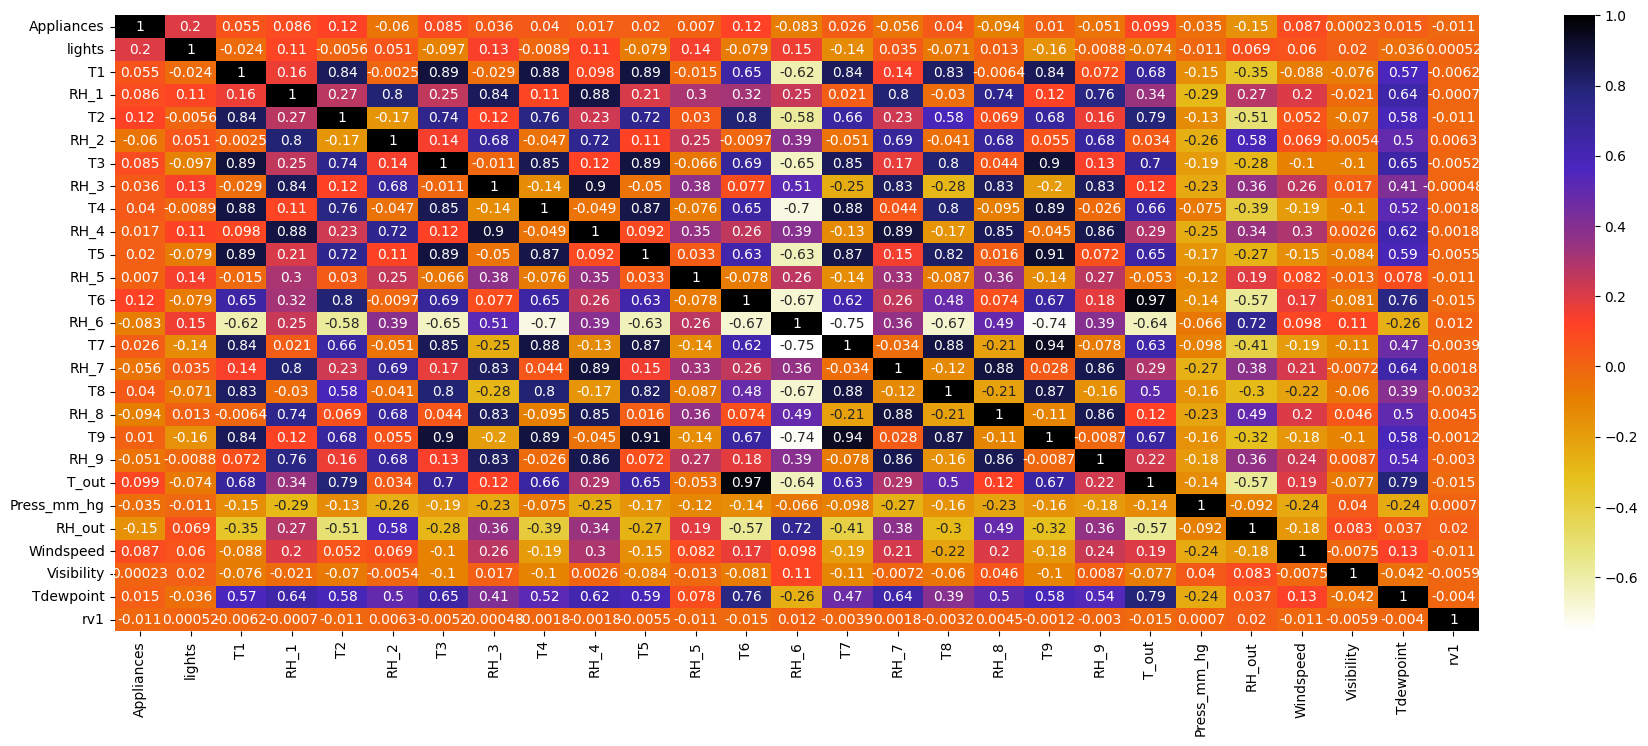

In [ ]:
# Check the correlation using heatmap on data set
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(22,8))
cor = int_columns_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
new_df = pd.get_dummies(df,drop_first=True,sparse=True)
new_df.head()


Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  day_of_week_Saturday  day_of_week_Sunday  \
0  19.000000  45.566667  ...                 False               False   
1  19.000000  45.992500  ...                 False               False   
2  18.926667  45.890000  ...                 False               False   
3  18.890000  45.723333  ...                 False               False   
4  18.890000  45.530000  ...                 False               False   

   day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  \
0                 False                False                  False   
1                 False                False                  False   
2                 False                False                  False   
3                 False                False                  False   
4                 False                False                  False   

   month_February  month_January  month_March  month_May  week_weekend  
0           False           True        False      False         False  
1           False           True        False      False         False  
2           False           True        False      False         False  
3           False           True        False      False         False  
4           False           True        False      False         False  

[5 rows x 38 columns]

In [ ]:
x = new_df.drop('Appliances',axis=1)
y = new_df['Appliances']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split our data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15788, 37)
(3947, 37)
(15788,)
(3947,)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
#import dependancy
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# ML Model - 1 Implementation
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')


  # Here we appending the parameters for all models
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass


# Fit the Algorithm

# Predict on the model

Training score  = 0.17840356378812183
MAE : 52.698578366500875
MSE : 8269.242346813882
RMSE : 90.93537456245441
R2 : 0.173661729558922
Adjusted R2 :  0.16584015984638167 

********************************************************************************
coefficient 
 [ 1.98835662e+00 -4.33262923e+00  1.69526464e+01 -1.87723907e+01
 -1.55480090e+01  2.74810023e+01  5.20920213e+00  3.49156021e-01
 -3.38170214e-01 -9.06986661e-02  2.40758923e-01  6.70787752e+00
  2.79983275e-01 -6.73161429e-01 -1.26279131e+00  1.00073344e+01
 -5.16188233e+00 -1.02708267e+01 -7.77323441e-01 -8.49994689e+00
  8.72117475e-02 -6.07100811e-01  1.64571203e+00  1.75774692e-01
  3.32456479e+00  1.64150411e-02 -1.24728147e+01  7.18376394e+00
 -1.18858142e+01 -2.18958839e+01 -2.44792773e+01 -1.92530394e+01
  2.33873147e+00  3.40836872e+01  1.88815332e+01 -1.32209447e+01
 -4.70205030e+00]


Intercept  =  -59.65208420178283


******************** ploting the graph of Actual and predicted only with 80 observation *****

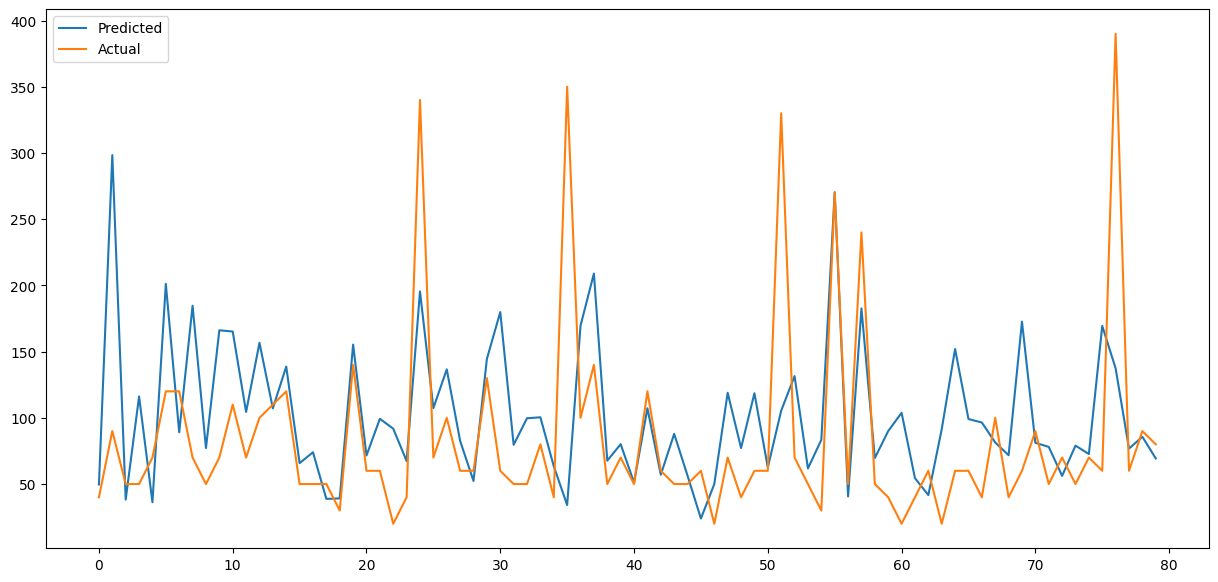

In [ ]:
#linear regression
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

#### 2. Cross- Validation & Hyperparameter Tuning

Training score  = 0.1705245237740095
The best parameters found out to be :{'alpha': 0.01} 
where model best score is:  0.16562884336722658 

MAE : 53.82398101684634
MSE : 8419.48198869093
RMSE : 91.75773530711692
R2 : 0.1524461292879481
Adjusted R2 :  0.14604100403951137 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


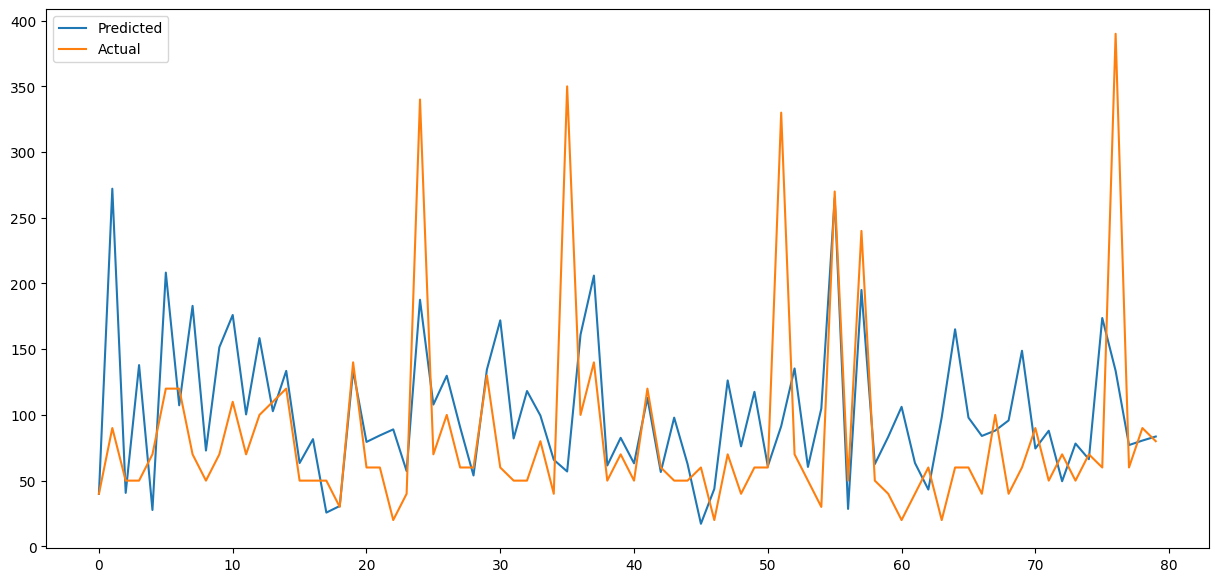

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

no such improvements

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

Training score  = 0.17837757245022945
The best parameters found out to be :{'alpha': 20} 
where model best score is:  0.17393197537283273 

MAE : 52.66767496535227
MSE : 8266.49573249008
RMSE : 90.92027129573515
R2 : 0.1739361963643089
Adjusted R2 :  0.16611722457241307 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


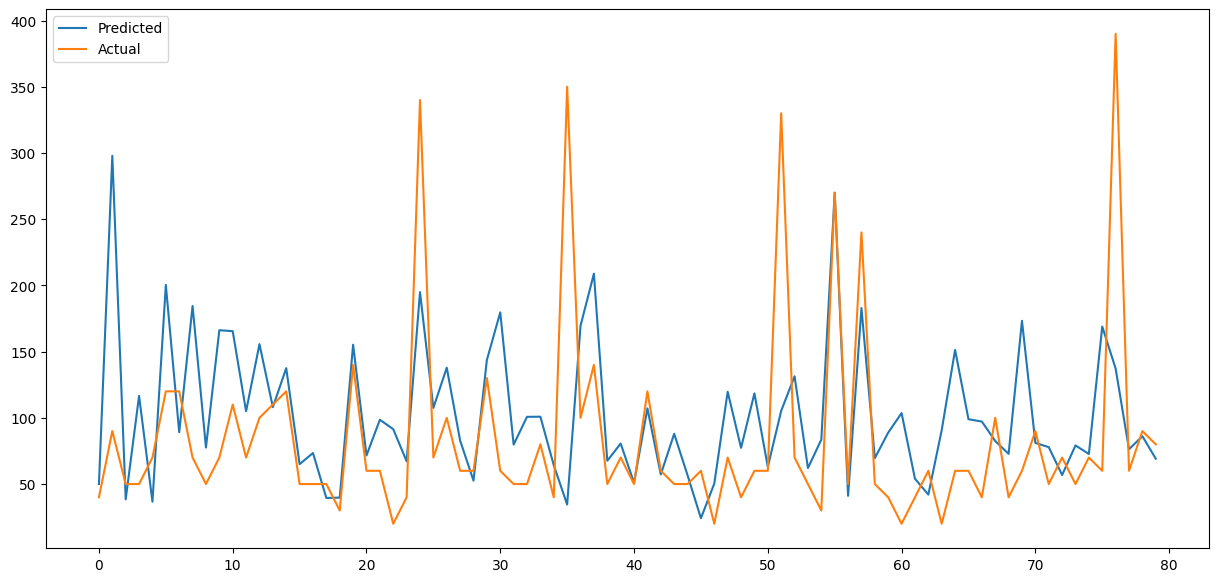

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

### ML Model - 4 - Polynomial features



Training score  = 0.41195652195825017
MAE : 49.02663356051468
MSE : 6767.983248894188
RMSE : 82.26775339642009
R2 : 0.32368125909137946
Adjusted R2 :  0.16731552211375456 

********************************************************************************
coefficient 
 [-1.56384367e-07 -2.53272431e+01  3.45994068e+02 -6.81857630e+01
  6.22640264e+02  1.64856048e+02  3.04625956e+01  4.44548700e+02
  5.03563237e+02  1.33508993e+00 -1.47056461e+03 -7.31586624e+00
  4.06176517e+02  9.42806057e+00 -2.35248711e+02  2.90379033e+02
  1.65040478e+03  9.11767799e+01 -1.27855356e+03 -2.51855995e+02
  5.81767078e+02  9.32957577e+01  2.05616090e+02 -6.58250351e+00
 -7.81987838e+00 -1.62389101e+03  1.94110440e+00 -1.01973937e+03
 -1.42206247e+02 -1.01988670e+02  8.98614304e+01 -6.83661551e+02
 -6.85109978e+02 -2.01782639e+03 -1.78692567e+03 -2.05308481e+03
  1.07729646e+03 -2.44194918e+02 -1.34690924e-02  3.97269135e-01
  2.23704743e-01 -9.95261440e-01 -4.70420382e-01  3.73459113e-01
 -1.99288416e-01 

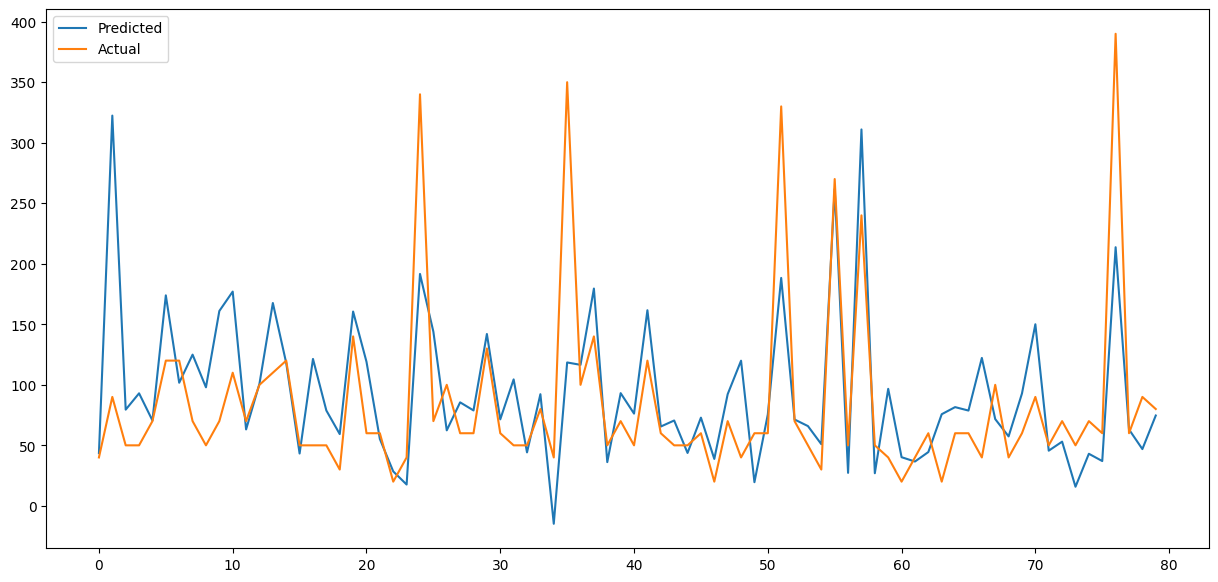

In [ ]:
poly = PolynomialFeatures(degree = 2)
poly_X_train = poly.fit_transform(x_train)
poly_X_test = poly.fit_transform(x_test)
score_metrix(LinearRegression(), poly_X_train,poly_X_test,y_train,y_test)

In [ ]:
new_df.columns


Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'month_February', 'month_January',
       'month_March', 'month_May', 'week_weekend'],
      dtype='object')

### ML Model - 5 - KNN Regression

In [ ]:
new_x = new_df.drop('Appliances',axis=1)
new_y = new_df['Appliances']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size=0.25,random_state=42)


In [ ]:
scaler = PowerTransformer()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Training score  = 0.585198987813579
MAE : 38.35468179975679
MSE : 6325.39197405756
RMSE : 79.53233288454174
R2 : 0.36324937109141753
Adjusted R2 :  0.3584373258974597 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


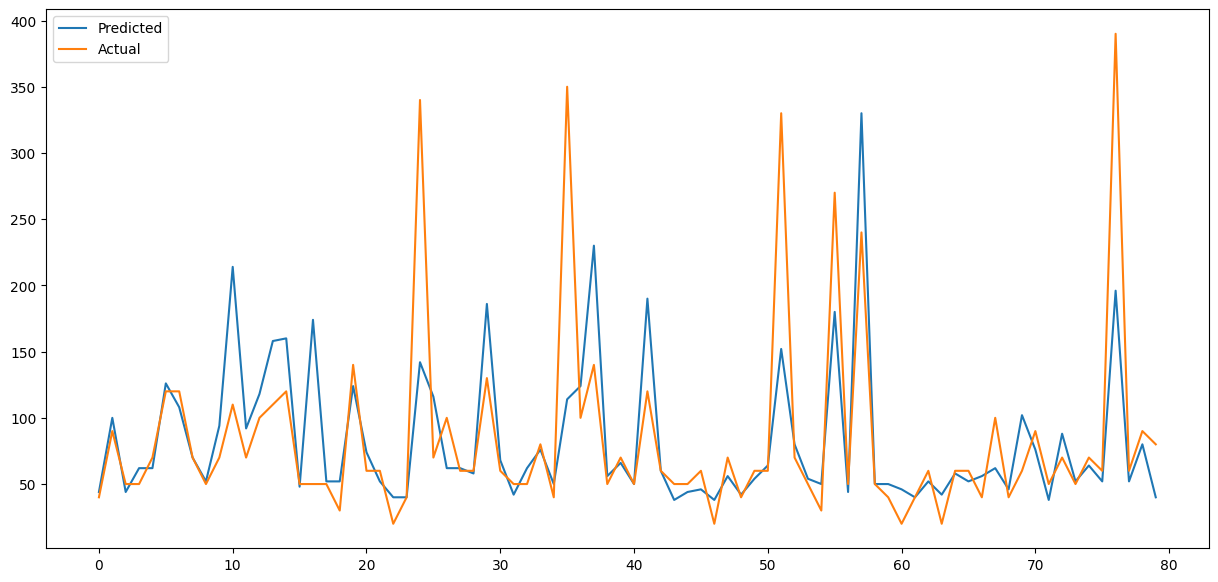

In [ ]:
knn = KNeighborsRegressor()
score_metrix(knn,x_train,x_test,y_train,y_test)

### ML Model - 6 - Decision Tree

In [ ]:
# Initialize and fit the Decision Tree Regressor with basic parameters
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(x_test)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Decision Tree R^2 Score:", r2_score(y_test, y_pred_dt))

# Hyperparameter tuning
dt_params = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 10, 20]}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, scoring='neg_mean_squared_error', cv=5)
grid_dt.fit(x_train, y_train)

# Evaluate tuned Decision Tree
best_dt_model = grid_dt.best_estimator_
y_pred_dt_tuned = best_dt_model.predict(x_test)
print("Tuned Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_tuned)))
print("Tuned Decision Tree R^2 Score:", r2_score(y_test, y_pred_dt_tuned))


Decision Tree RMSE: 95.86918106667446
Decision Tree R^2 Score: 0.07479073205172171
Tuned Decision Tree RMSE: 88.96131726276535
Tuned Decision Tree R^2 Score: 0.2033192027838704


In [ ]:
score_metrix(best_dt_model,x_train,x_test,y_train,y_test)

### ML Model - 7 - Random Forest

In [ ]:
# Initialize and fit Random Forest Regressor with basic parameters
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(x_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))

# Hyperparameter tuning
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 15, None], 'min_samples_split': [2, 10]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(x_train, y_train)

# Evaluate tuned Random Forest
best_rf_model = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(x_test)
print("Tuned Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)))
print("Tuned Random Forest R^2 Score:", r2_score(y_test, y_pred_rf_tuned))


Random Forest RMSE: 69.02484379999201
Random Forest R^2 Score: 0.5203849478712184
Tuned Random Forest RMSE: 68.94163525949867
Tuned Random Forest R^2 Score: 0.5215405901578205


Training score  = 0.9329280109494033
MAE : 32.75823875152006
MSE : 4752.949072253749
RMSE : 68.94163525949867
R2 : 0.5215405901578205
Adjusted R2 :  0.5179247817092583 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


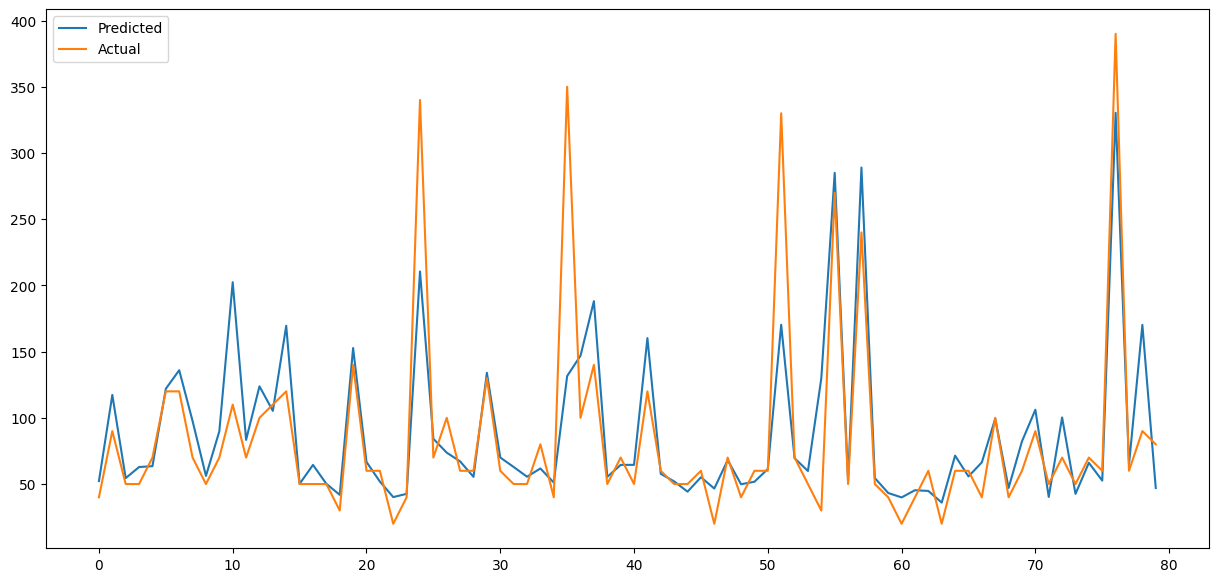

In [ ]:
score_metrix(best_rf_model,x_train,x_test,y_train,y_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***